Dhila Pritha Amalia / 24060122140117 / C1

**Agglomerative Clustering pada Dataset Random**

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

In [5]:
# Generate random dataset
X, _ = make_blobs(n_samples=50, centers=3, random_state=42)


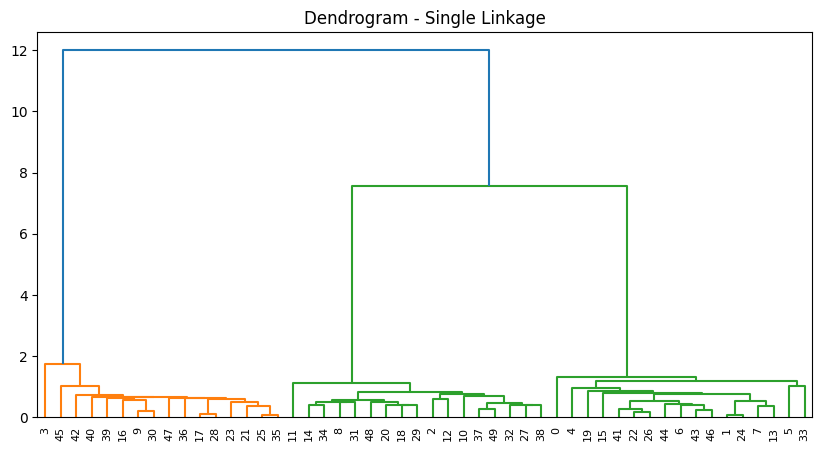

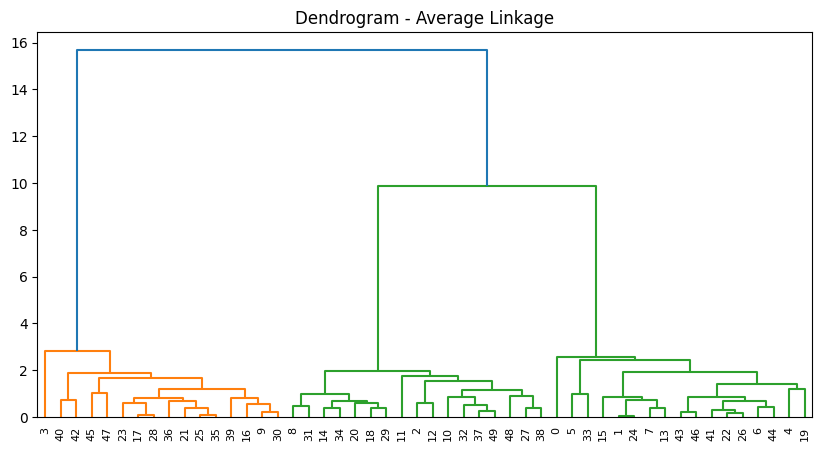

In [6]:
# Scipy - Single Linkage
Z_single = linkage(X, method='single')
plt.figure(figsize=(10, 5))
plt.title("Dendrogram - Single Linkage")
dendrogram(Z_single)
plt.show()

# Scipy - Average Linkage
Z_average = linkage(X, method='average')
plt.figure(figsize=(10, 5))
plt.title("Dendrogram - Average Linkage")
dendrogram(Z_average)
plt.show()

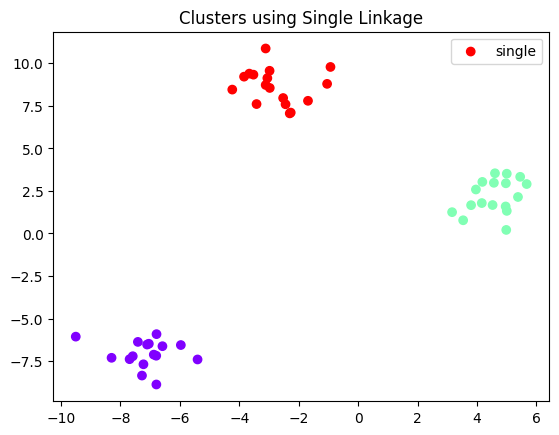

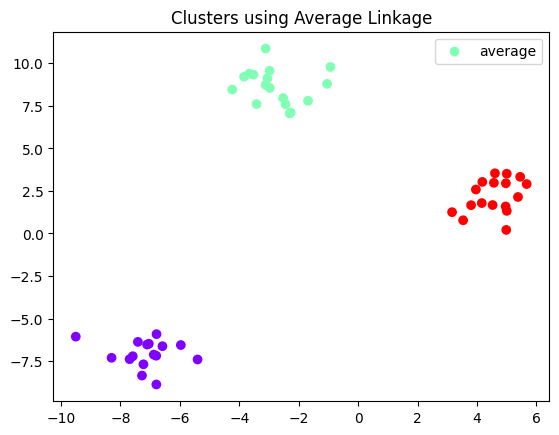

In [7]:
# Scikit-learn for comparison
for linkage_method in ['single', 'average']:
    clustering = AgglomerativeClustering(linkage=linkage_method, n_clusters=3)
    labels = clustering.fit_predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow', label=linkage_method)
    plt.title(f"Clusters using {linkage_method.capitalize()} Linkage")
    plt.legend()
    plt.show()

Kode yang diberikan mendemonstrasikan penggunaan teknik Agglomerative Clustering atau klastering aglomeratif dengan dataset acak menggunakan dua metode linkage yang berbeda, yaitu single linkage dan average linkage. Pertama, dataset acak dengan 50 sampel dan 3 pusat (klaster) dihasilkan menggunakan fungsi make_blobs. Kemudian, menggunakan scipy.cluster.hierarchy.linkage, klastering hierarkis dilakukan dengan metode single linkage, yang menggabungkan klaster berdasarkan jarak terpendek antar anggota klaster. Hasil klastering ini divisualisasikan dalam bentuk dendrogram, yang menunjukkan bagaimana klaster-klaster tersebut bergabung seiring bertambahnya langkah dalam proses aglomerasi. Selanjutnya, proses yang sama dilakukan dengan metode average linkage, yang menggabungkan klaster berdasarkan rata-rata jarak antara semua pasangan titik data di dua klaster yang berbeda. Terakhir, untuk perbandingan, klastering juga dilakukan menggunakan AgglomerativeClustering dari scikit-learn dengan metode linkage yang sama dan jumlah klaster yang ditentukan, lalu hasilnya divisualisasikan dengan plot sebar yang menunjukkan klaster-klaster yang terbentuk.

**Agglomerative Clustering pada Dataset Cars**

In [8]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist



In [9]:
# Membaca file dataset
filename = 'cars_clus.csv'
data = pd.read_csv(filename)

In [10]:
# Melihat dimensi dataset dan beberapa data teratas
print(f"Dimensi dataset: {data.shape}")
print(data.head())

Dimensi dataset: (159, 16)
  manufact    model   sales  resale type   price engine_s horsepow wheelbas  \
0    Acura  Integra  16.919   16.36    0    21.5      1.8      140    101.2   
1    Acura       TL  39.384  19.875    0    28.4      3.2      225    108.1   
2    Acura       CL  14.114  18.225    0  $null$      3.2      225    106.9   
3    Acura       RL   8.588  29.725    0      42      3.5      210    114.6   
4     Audi       A4  20.397  22.255    0   23.99      1.8      150    102.6   

  width length curb_wgt fuel_cap mpg lnsales  partition  
0  67.3  172.4    2.639     13.2  28   2.828          0  
1  70.3  192.9    3.517     17.2  25   3.673          0  
2  70.6    192     3.47     17.2  26   2.647          0  
3  71.4  196.6     3.85       18  22    2.15          0  
4  68.2    178    2.998     16.4  27   3.015          0  


In [11]:
# Membersihkan data: mengubah kolom yang relevan menjadi numerik dan menghapus baris yang mengandung nilai NaN
data[['sales', 'resale', 'type', 'price', 'engine_s', 'horsepow', 'wheelbas', 'width', 'length',
      'curb_wgt', 'fuel_cap', 'mpg', 'lnsales']] = data[['sales', 'resale', 'type', 'price', 'engine_s',
                                                           'horsepow', 'wheelbas', 'width', 'length',
                                                           'curb_wgt', 'fuel_cap', 'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')
data_cleaned = data.dropna().reset_index(drop=True)


print(f"Dimensi dataset setelah pembersihan: {data_cleaned.shape}")
print(data_cleaned.head())

Dimensi dataset setelah pembersihan: (117, 16)
  manufact    model   sales  resale  type  price  engine_s  horsepow  \
0    Acura  Integra  16.919  16.360   0.0  21.50       1.8     140.0   
1    Acura       TL  39.384  19.875   0.0  28.40       3.2     225.0   
2    Acura       RL   8.588  29.725   0.0  42.00       3.5     210.0   
3     Audi       A4  20.397  22.255   0.0  23.99       1.8     150.0   
4     Audi       A6  18.780  23.555   0.0  33.95       2.8     200.0   

   wheelbas  width  length  curb_wgt  fuel_cap   mpg  lnsales  partition  
0     101.2   67.3   172.4     2.639      13.2  28.0    2.828          0  
1     108.1   70.3   192.9     3.517      17.2  25.0    3.673          0  
2     114.6   71.4   196.6     3.850      18.0  22.0    2.150          0  
3     102.6   68.2   178.0     2.998      16.4  27.0    3.015          0  
4     108.7   76.1   192.0     3.561      18.5  22.0    2.933          0  


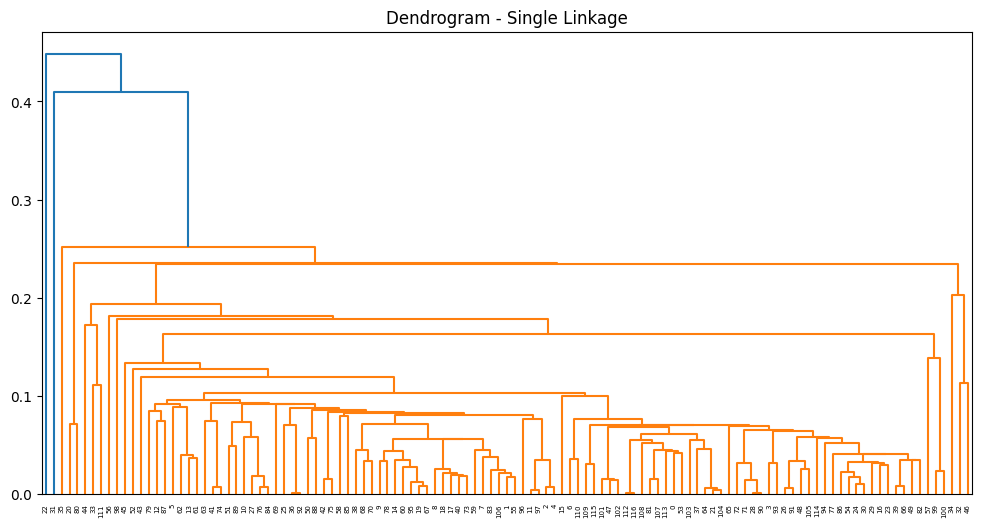

In [15]:
# Seleksi fitur yang akan digunakan untuk clustering
features = data_cleaned[['engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]

# Normalisasi fitur menggunakan MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Mengurangi dimensi data menjadi 2D menggunakan PCA (jika fitur lebih dari 2 dimensi)
if scaled_features.shape[1] > 2:
    pca = PCA(n_components=2)
    reduced_features = pca.fit_transform(scaled_features)
else:
    reduced_features = scaled_features

# 1. Agglomerative Clustering menggunakan Scipy (Single Linkage)
Z_single = linkage(reduced_features, method='single')

# Plotting dendrogram untuk Single Linkage
plt.figure(figsize=(12, 6))
plt.title("Dendrogram - Single Linkage")
dendrogram(Z_single)
plt.show()

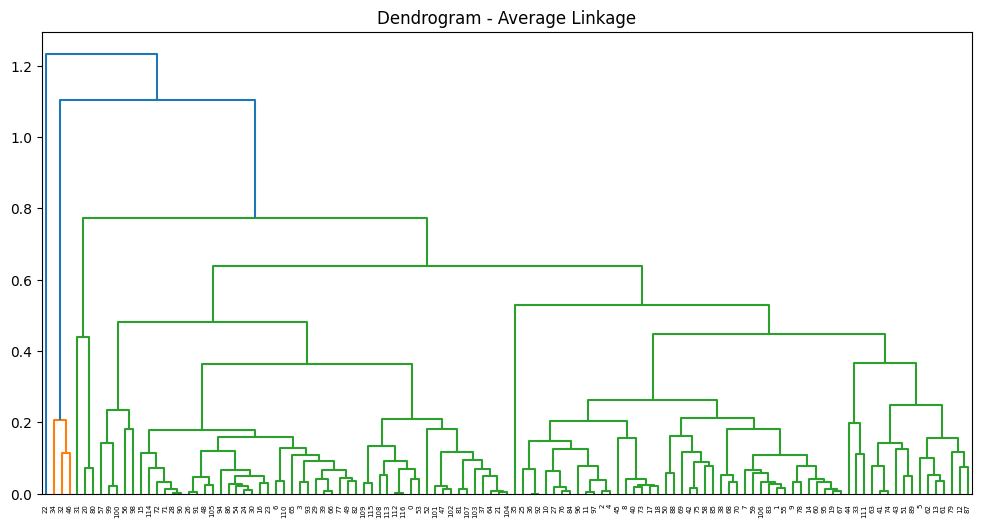

In [16]:
# 2. Agglomerative Clustering menggunakan Scipy (Average Linkage)
Z_average = linkage(reduced_features, method='average')

# Plotting dendrogram untuk Average Linkage
plt.figure(figsize=(12, 6))
plt.title("Dendrogram - Average Linkage")
dendrogram(Z_average)
plt.show()

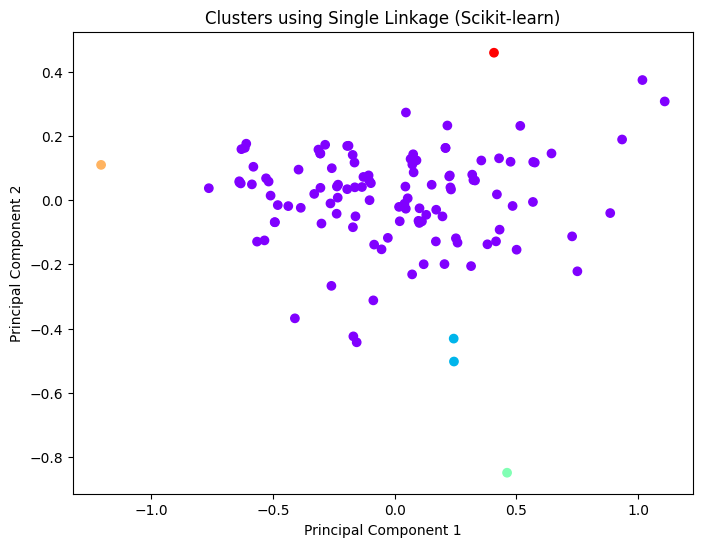

In [17]:
# 3. Clustering dengan menggunakan Scikit-learn (Single Linkage)
agglom_single = AgglomerativeClustering(n_clusters=5, linkage='single')
labels_single = agglom_single.fit_predict(reduced_features)

# Plotting hasil clustering Single Linkage dengan Scikit-learn
plt.figure(figsize=(8, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_single, cmap='rainbow', marker='o')
plt.title("Clusters using Single Linkage (Scikit-learn)")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

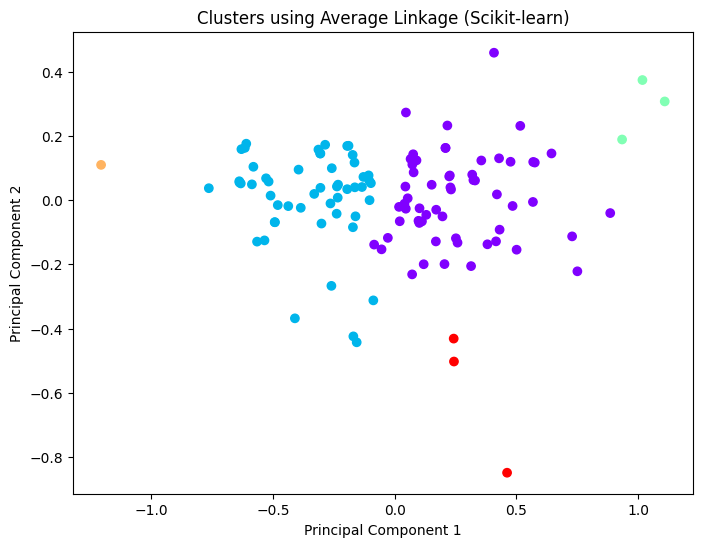

In [19]:
# 4. Clustering dengan menggunakan Scikit-learn (Average Linkage)
agglom_average = AgglomerativeClustering(n_clusters=5, linkage='average')
labels_average = agglom_average.fit_predict(reduced_features)

# Plotting hasil clustering Average Linkage dengan Scikit-learn
plt.figure(figsize=(8, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_average, cmap='rainbow', marker='o')
plt.title("Clusters using Average Linkage (Scikit-learn)")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [20]:
# Menambahkan kolom cluster pada data untuk analisis lebih lanjut
data_cleaned['cluster_single'] = labels_single
data_cleaned['cluster_average'] = labels_average

# Menghitung rata-rata untuk fitur-fitur dalam setiap cluster
cluster_means_single = data_cleaned.groupby('cluster_single')[['horsepow', 'engine_s', 'mpg', 'price']].mean()
cluster_means_average = data_cleaned.groupby('cluster_average')[['horsepow', 'engine_s', 'mpg', 'price']].mean()

# Menampilkan rata-rata untuk setiap cluster (Single Linkage)
print("Rata-rata fitur dalam cluster (Single Linkage):")
print(cluster_means_single)

# Menampilkan rata-rata untuk setiap cluster (Average Linkage)
print("Rata-rata fitur dalam cluster (Average Linkage):")
print(cluster_means_average)

# Membandingkan hasil clustering Single Linkage dan Average Linkage
print("\nPerbedaan antara clustering Single Linkage dan Average Linkage:")
print(f"Jumlah cluster untuk Single Linkage: {len(np.unique(labels_single))}")
print(f"Jumlah cluster untuk Average Linkage: {len(np.unique(labels_average))}")

Rata-rata fitur dalam cluster (Single Linkage):
                  horsepow  engine_s        mpg      price
cluster_single                                            
0               178.017857  2.986607  24.105357  25.126652
1               323.500000  5.350000  21.000000  64.152500
2               450.000000  8.000000  16.000000  69.725000
3                55.000000  1.000000  45.000000   9.235000
4               120.000000  2.500000  19.000000  16.980000
Rata-rata fitur dalam cluster (Average Linkage):
                   horsepow  engine_s        mpg      price
cluster_average                                            
0                204.000000  3.536207  22.151724  29.826259
1                146.173077  2.273077  26.596154  19.928308
2                208.333333  4.566667  17.000000  21.656667
3                 55.000000  1.000000  45.000000   9.235000
4                365.666667  6.233333  19.333333  66.010000

Perbedaan antara clustering Single Linkage dan Average Linkage:
Jumla

Kode ini menerapkan *Agglomerative Clustering* pada dataset mobil dengan dua metode *linkage* yang berbeda, yaitu *single linkage* dan *average linkage*. Setelah membaca dan membersihkan data, fitur relevan dipilih dan dinormalisasi menggunakan *MinMaxScaler*. Kemudian, dimensi data dikurangi menjadi dua dimensi dengan menggunakan PCA. Selanjutnya, klastering dilakukan menggunakan metode *linkage* yang berbeda melalui `scipy.cluster.hierarchy.linkage` untuk membuat dendrogram, serta `AgglomerativeClustering` dari scikit-learn untuk melakukan klastering dengan jumlah klaster yang ditentukan. Hasil klastering divisualisasikan dalam grafik sebar, dan rata-rata fitur setiap klaster dihitung untuk analisis lebih lanjut. Perbandingan antara hasil klastering dengan *single linkage* dan *average linkage* juga dilakukan.

**Agglomerative Clustering pada Dataset Iris**

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.decomposition import PCA
import matplotlib.cm as cm

In [22]:
# Memuat dataset Iris dari URL
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)


In [23]:
# Menampilkan beberapa baris awal dan dimensi dataset
print(f"Dimensi dataset: {dataset.shape}")
print(dataset.head())

Dimensi dataset: (150, 5)
   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [24]:
# Memisahkan fitur dan target
X_iris = dataset.iloc[:, :-1].values  # Semua kolom kecuali 'class'
y_iris = dataset.iloc[:, -1].values   # Kolom 'class'


# Reduksi dimensi ke 2D menggunakan PCA untuk visualisasi
pca = PCA(n_components=2)
X_iris_2d = pca.fit_transform(X_iris)


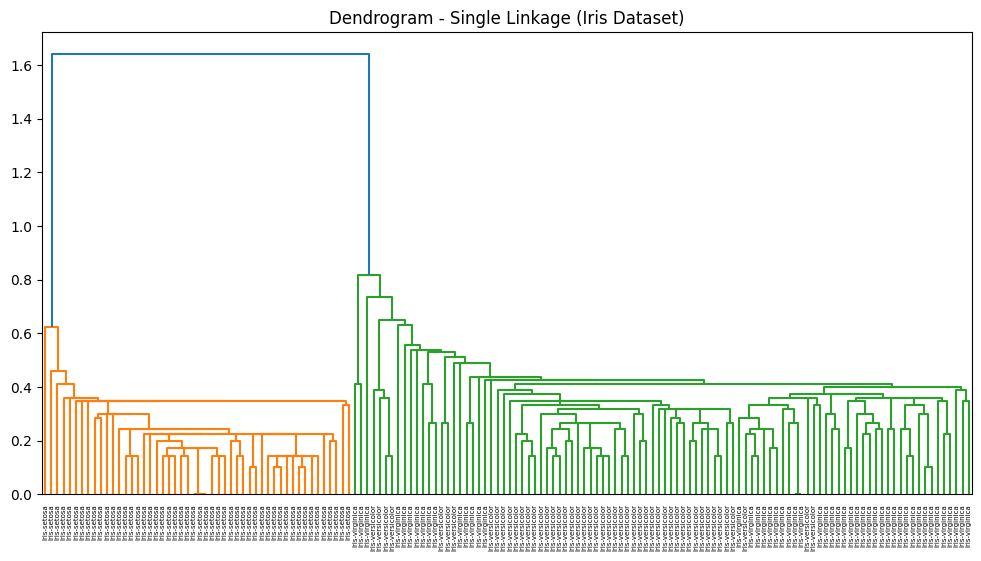

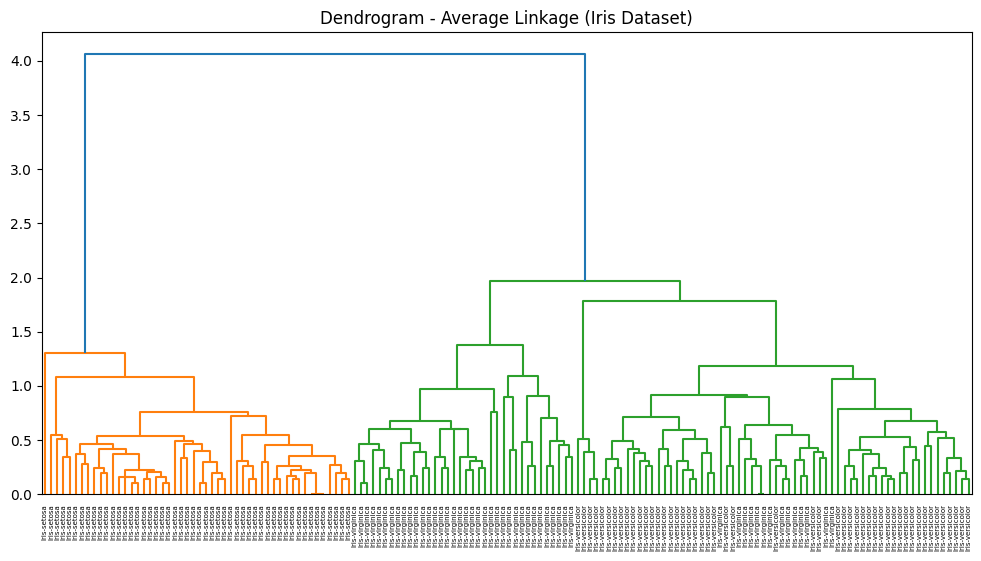

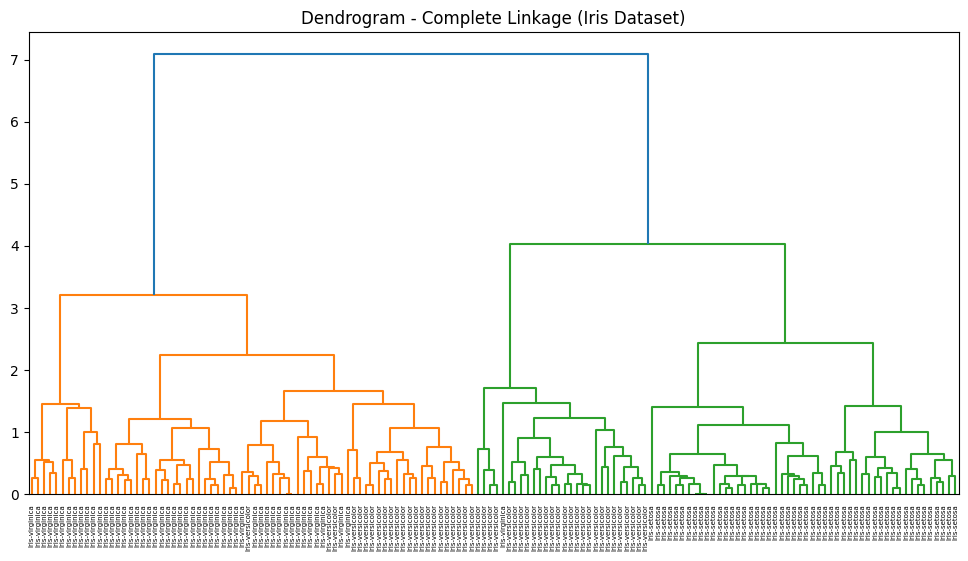

In [25]:
# 1. Scipy - Single, Average, Complete Linkage (Dendrograms)
for method in ['single', 'average', 'complete']:
    Z = linkage(X_iris, method=method)
    plt.figure(figsize=(12, 6))
    plt.title(f"Dendrogram - {method.capitalize()} Linkage (Iris Dataset)")
    dendrogram(Z, labels=y_iris)  # Menambahkan label untuk setiap data
    plt.show()

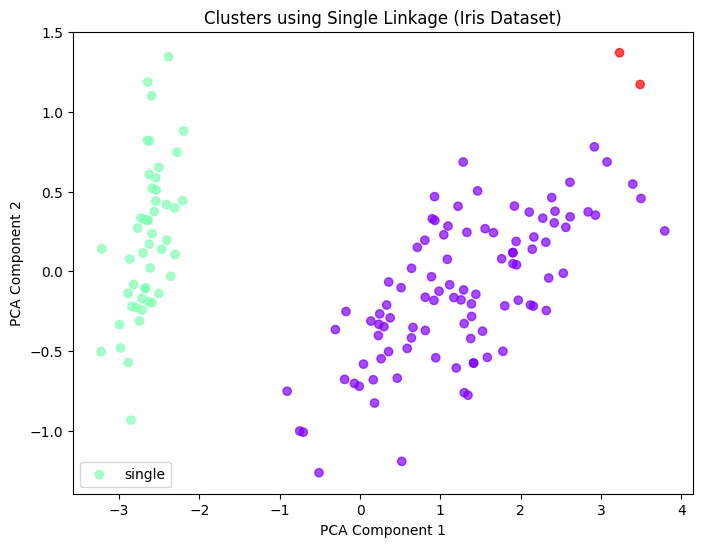

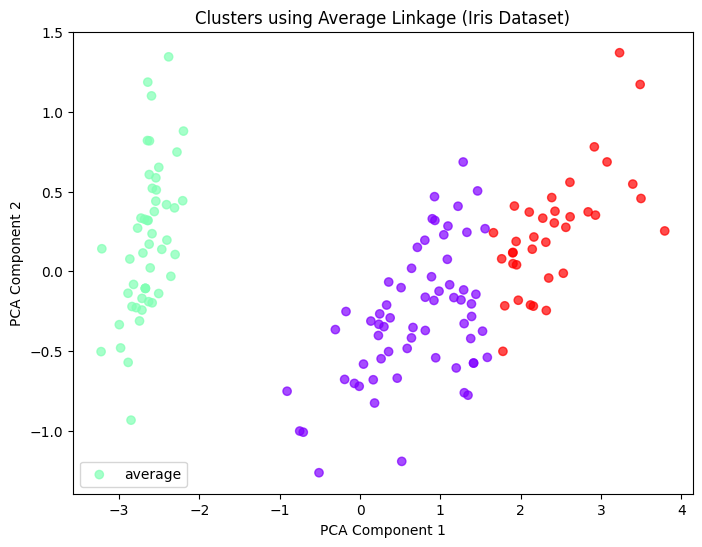

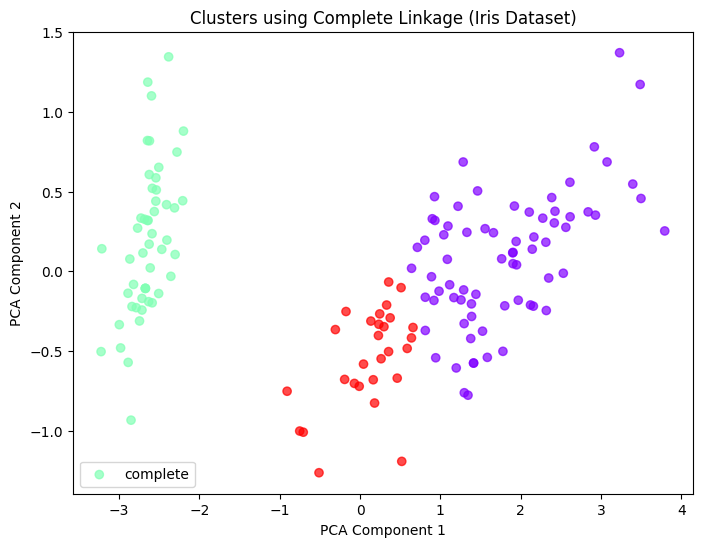

In [26]:
# 2. Clustering dengan Scikit-learn untuk Single, Average, Complete Linkage
for linkage_method in ['single', 'average', 'complete']:
    clustering = AgglomerativeClustering(n_clusters=3, linkage=linkage_method)
    labels = clustering.fit_predict(X_iris)

    # Visualisasi hasil clustering
    plt.figure(figsize=(8, 6))
    plt.scatter(X_iris_2d[:, 0], X_iris_2d[:, 1], c=labels, cmap='rainbow', label=linkage_method, alpha=0.7)
    plt.title(f"Clusters using {linkage_method.capitalize()} Linkage (Iris Dataset)")
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.show()

Jumlah data di setiap cluster:
 cluster
0    72
1    50
2    28
Name: cluster, dtype: int64

Rata-rata fitur per cluster:
          sepal-length  sepal-width  petal-length  petal-width
cluster                                                      
0            6.545833     2.963889      5.273611     1.850000
1            5.006000     3.418000      1.464000     0.244000
2            5.532143     2.635714      3.960714     1.228571


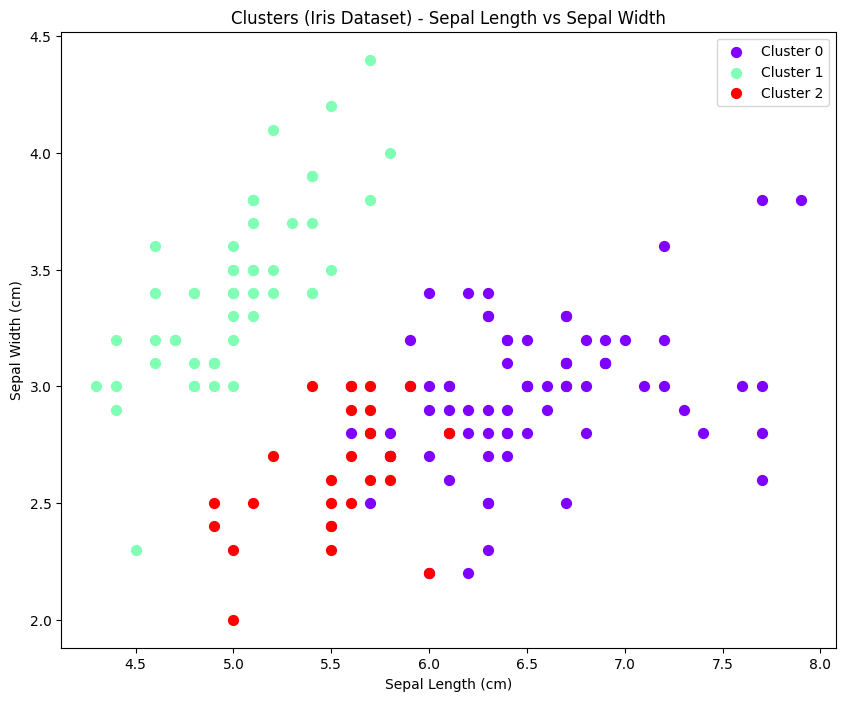

In [27]:
# Menambahkan cluster ke dalam dataset untuk analisis lebih lanjut
dataset['cluster'] = labels

# Menghitung jumlah data di setiap cluster
cluster_counts = dataset.groupby('cluster')['cluster'].count()
print("Jumlah data di setiap cluster:\n", cluster_counts)

# Melihat rata-rata setiap fitur per cluster
agg_iris = dataset.groupby('cluster')[['sepal-length', 'sepal-width', 'petal-length', 'petal-width']].mean()
print("\nRata-rata fitur per cluster:\n", agg_iris)

# Visualisasi untuk melihat cluster berdasarkan sepal length dan sepal width
plt.figure(figsize=(10, 8))
n_clusters = max(labels) + 1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))

for color, label in zip(colors, range(n_clusters)):
    subset = dataset[dataset['cluster'] == label]
    plt.scatter(subset['sepal-length'], subset['sepal-width'], s=50, c=[color], label=f'Cluster {label}')

plt.title('Clusters (Iris Dataset) - Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()

Kode ini menerapkan *Agglomerative Clustering* pada dataset Iris untuk mengelompokkan data berdasarkan fitur sepal dan petal. Dataset dimuat dari URL dan diproses dengan menghapus kolom target untuk clustering. Setelah itu, dilakukan reduksi dimensi menggunakan PCA agar data dapat divisualisasikan dalam 2D. Tiga metode *linkage* berbeda (single, average, dan complete) digunakan untuk membangun dendrogram dan melakukan clustering dengan `AgglomerativeClustering` dari scikit-learn. Hasil clustering divisualisasikan dengan warna berbeda untuk setiap klaster, dan jumlah data serta rata-rata fitur untuk setiap klaster dihitung. Visualisasi tambahan juga dilakukan untuk membandingkan cluster berdasarkan panjang dan lebar sepal.